In [1]:
import pandas as pd

lab = pd.read_csv("data/eicu/lab.csv")

In [2]:
lab.head()

,labid,patientunitstayid,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedoffset
0,52307161,141168,2026,3,fibrinogen,177.0,177,mg/dL,mg/dL,2219
1,50363251,141168,1133,3,PT - INR,2.5,2.5,ratio,NaN,1208
2,49149139,141168,2026,1,magnesium,2.0,2.0,mg/dL,mg/dL,2090
3,50363250,141168,1133,3,PT,26.6,26.6,sec,sec,1208
4,66695374,141168,2141,7,pH,7.2,7.20,NaN,Units,2155


In [3]:
lab[lab["labresultoffset"] <= 48 * 60]

,labid,patientunitstayid,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedoffset
0,52307161,141168,2026,3,fibrinogen,177.00,177,mg/dL,mg/dL,2219
1,50363251,141168,1133,3,PT - INR,2.50,2.5,ratio,NaN,1208
2,49149139,141168,2026,1,magnesium,2.00,2.0,mg/dL,mg/dL,2090
3,50363250,141168,1133,3,PT,26.60,26.6,sec,sec,1208
4,66695374,141168,2141,7,pH,7.20,7.20,NaN,Units,2155
...,...,...,...,...,...,...,...,...,...,...
39132526,824772675,3353263,-7,3,WBC x 1000,6.40,6.4,K/mcL,K/uL,6
39132527,826470517,3353263,1733,3,RBC,4.67,4.67,M/mcL,M/uL,1774
39132528,824772678,3353263,-7,3,-monos,10.00,10,%,%,6
39132529,826470516,3353263,1733,3,WBC x 1000,6.60,6.6,K/mcL,K/uL,1774


In [4]:
lab["labname"]

0           fibrinogen
1             PT - INR
2            magnesium
3                   PT
4                   pH
               ...    
39132526    WBC x 1000
39132527           RBC
39132528        -monos
39132529    WBC x 1000
39132530           MCH
Name: labname, Length: 39132531, dtype: object

In [5]:
patient = pd.read_csv("data/eicu/patient.csv")

Use lab patients:  [5897, 4603, 4122, 3643, 3335, 2988, 2837, 2506, 2096, 2086]
No lab patients:  [195, 76, 118, 58, 36, 65, 44, 25, 14, 11]


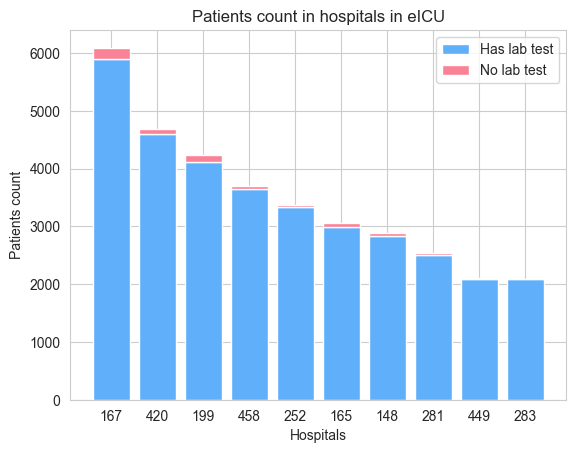

In [6]:
import matplotlib.pyplot as plt

has_lab_patients = []
no_lab_patients = []

for idx, hospital_id in enumerate([167, 420, 199, 458, 252, 165, 148, 281, 449, 283]):
    
    hospital_patient = patient[patient["hospitalid"] == hospital_id]
    total_hospital_patient = len(hospital_patient)

    hospital_lab = lab[lab["patientunitstayid"].isin(hospital_patient["patientunitstayid"])]
    has_lab_patients_count = len(hospital_lab["patientunitstayid"].unique())
    no_lab_patients_count = total_hospital_patient - has_lab_patients_count
    
    has_lab_patients.append(has_lab_patients_count)
    no_lab_patients.append(no_lab_patients_count)

print("Use lab patients: ", has_lab_patients)
print("No lab patients: ", no_lab_patients)

selected_hospital_labels = ["167", "420", "199", "458", "252", "165", "148", "281", "449", "283"]

# plt.figure(figsize=(10,6))
plt.title("Patients count in hospitals in eICU")
plt.bar(selected_hospital_labels, has_lab_patients, label='Has lab test', color="#5faffa")
plt.bar(selected_hospital_labels, no_lab_patients, bottom=has_lab_patients, label='No lab test', color="#fa8296")
plt.legend()
plt.xlabel("Hospitals")
plt.ylabel("Patients count")
plt.show()

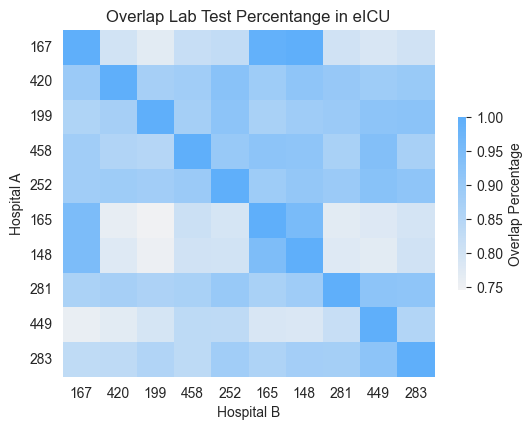

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

selected_hospitals = [167, 420, 199, 458, 252, 165, 148, 281, 449, 283]

hospital_lab_mapping = {}
for hospital_id in selected_hospitals:
    
    hospital_patient = patient[patient["hospitalid"] == hospital_id]
    hospital_lab = lab[lab["patientunitstayid"].isin(hospital_patient["patientunitstayid"])]
    
    hospital_lab_mapping[hospital_id] = hospital_lab["labname"].unique()

lab_percentage = np.zeros((len(selected_hospitals), len(selected_hospitals)))
for i, hospital_id_1 in enumerate(selected_hospitals):
    for j, hospital_id_2 in enumerate(selected_hospitals):
        lab_names_1 = hospital_lab_mapping[hospital_id_1]
        lab_names_2 = hospital_lab_mapping[hospital_id_2]
        lab_percentage[i, j] = len(np.intersect1d(lab_names_1, lab_names_2)) / len(lab_names_2)

# Overlap Drugs Percentage in Hospitals: |A ∩ B| / |B|
plt.figure(figsize=(6, 4.5))
plt.title("Overlap Lab Test Percentange in eICU")
rdgn = sns.light_palette(color="#5faffa", n_colors=100)
ax = sns.heatmap(lab_percentage, cmap=rdgn, cbar_kws={'shrink': 0.5})
ax.set_yticklabels(selected_hospitals, rotation=0)
ax.set_xticklabels(selected_hospitals)
colorbar = ax.collections[0].colorbar
colorbar.set_label("Overlap Percentage")
plt.xlabel("Hospital B")
plt.ylabel("Hospital A")
plt.show()

In [8]:
labname_list = list(lab["labname"].unique())

Respiratory Rate: 呼吸频率

Temperature: 体温

O2 Sat (%): 血氧饱和度

In [9]:
print("WBC x 1000" in labname_list)

True


In [10]:
import pandas as pd

mimic_lab = pd.read_csv("data/mimic/LABEVENTS.csv")

In [11]:
mimic_lab.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 17:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 19:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 19:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 19:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 19:17:00,0.93,0.93,mmol/L,abnormal


In [12]:
mimic_lab_item = pd.read_csv("data/mimic/D_LABITEMS.csv")

In [13]:
list(mimic_lab_item["LABEL"].unique())

['CHLORIDE, STOOL',
 'OSMOLALITY, STOOL',
 'POTASSIUM, STOOL',
 'SODIUM, STOOL',
 '24 HR CALCIUM',
 '24 HR CREATININE',
 '24 HR PROTEIN',
 'ALBUMIN, URINE',
 'ALBUMIN/CREATININE, URINE',
 'AMPHETAMINE SCREEN, URINE',
 'AMYLASE, URINE',
 'AMYLASE/CREATININE RATIO, URINE',
 'BARBITURATE SCREEN, URINE',
 'BENZODIAZEPINE SCREEN, URINE',
 'BICARBONATE, URINE',
 'CALCIUM, URINE',
 'CHLORIDE, URINE',
 'COCAINE, URINE',
 'CREATININE CLEARANCE',
 'CREATININE, SERUM',
 'CREATININE, URINE',
 'ETHANOL, URINE',
 'GLUCOSE, URINE',
 'HCG, URINE, QUALITATIVE',
 'IMMUNOFIXATION, URINE',
 'LENGTH OF URINE COLLECTION',
 'MAGNESIUM, URINE',
 'MARIJUANA',
 'METHADONE, URINE',
 'MYOGLOBIN, URINE',
 'OPIATE SCREEN, URINE',
 'OSMOLALITY, URINE',
 'PH',
 'PHOSPHATE, URINE',
 'PORPHOBILINOGEN SCREEN',
 'POTASSIUM, URINE',
 'PROT. ELECTROPHORESIS, URINE',
 'PROTEIN/CREATININE RATIO',
 'SODIUM, URINE',
 'TOTAL COLLECTION TIME',
 'TOTAL PROTEIN, URINE',
 'UHOLD',
 'UREA NITROGEN, URINE',
 'URIC ACID, URINE',
 'URI

In [14]:
"WBC COUNT" in list(mimic_lab_item["LABEL"].unique())

True

In [15]:
mimic_lab_item[mimic_lab_item["LABEL"] == "WBC COUNT"]

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
238,500,51300,WBC COUNT,BLOOD,HEMATOLOGY,26464-8


In [16]:
(mimic_lab[mimic_lab["ITEMID"] == 51300])

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
1070,2364,4,NaN,51300,2191-04-27 13:55:00,3.5,3.5,K/uL,abnormal
1126,2420,4,NaN,51300,2191-05-16 17:15:00,15.4,15.4,K/uL,abnormal
2921,3210,4,NaN,51300,2191-07-13 13:30:00,8.3,8.3,K/uL,NaN
2991,3280,4,NaN,51300,2191-09-07 13:25:00,5.8,5.8,K/uL,NaN
3024,3313,4,NaN,51300,2191-11-02 14:10:00,3.5,3.5,K/uL,abnormal
...,...,...,...,...,...,...,...,...,...
27706019,27329301,95639,NaN,51300,2190-04-14 12:00:00,6.0,6.0,K/uL,NaN
27716245,27329610,95639,NaN,51300,2190-10-27 13:00:00,5.9,5.9,K/uL,NaN
27812983,27401994,96169,NaN,51300,2174-06-20 09:00:00,10.4,10.4,K/uL,NaN
27825714,27064444,93564,182778.0,51300,2200-03-10 06:05:00,4.1,4.1,K/uL,NaN


In [17]:
lab[lab["labname"] == "WBC x 1000"]

,labid,patientunitstayid,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedoffset
52,54358175,141168,2026,3,WBC x 1000,19.8,19.8,K/mcL,K/mcL,2148
118,56155662,141168,516,3,WBC x 1000,9.8,9.8,K/mcL,K/mcL,524
135,53275575,141168,1133,3,WBC x 1000,14.7,14.7,K/mcL,K/mcL,1196
148,53200536,141178,-280,3,WBC x 1000,7.6,7.6,K/mcL,K/mcL,-216
173,55330219,141179,1487,3,WBC x 1000,8.1,8.1,K/mcL,K/mcL,1546
...,...,...,...,...,...,...,...,...,...,...
39132454,825721748,3353263,-7,3,WBC x 1000,6.5,6.5,K/mcL,K/uL,6
39132487,826407074,3353263,3048,3,WBC x 1000,5.3,5.3,K/mcL,K/uL,3065
39132509,826254627,3353263,7490,3,WBC x 1000,4.5,4.5,K/mcL,K/uL,7506
39132526,824772675,3353263,-7,3,WBC x 1000,6.4,6.4,K/mcL,K/uL,6


In [18]:
eicu = pd.read_csv("eicu_dataset.csv")

In [19]:
eicu.head()

,patientunitstayid,hospitalid,death,acetamin,biotene,compazine,ferrous,imdur,lidocaine,milk of magnesia,...,sex_is_male,sex_is_female,< 30,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80 - 89,> 89
0,141168.0,59.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,141178.0,60.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,141179.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,141194.0,73.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,141196.0,67.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
eicu_time = pd.read_csv("eicu_time_dataset.csv")

In [21]:
eicu_time.head()

,Unnamed: 0,patientunitstayid,hospitalid,time_window,death,ventilator,sepsis,acetamin,biotene,compazine,...,sex_is_male,sex_is_female,< 30,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80 - 89,> 89
0,0,534765.0,148.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,534765.0,148.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,534765.0,148.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,534765.0,148.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,534765.0,148.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
len(lab['labname'].unique())

158

In [23]:
len(mimic_lab_item['LABEL'].unique())

590